In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as skl
import warnings

speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]


ROOT_DIR = ".."

warnings.filterwarnings("ignore")

In [ ]:
# Calculate the mean
mean = np.mean(speed)
print("Mean: ", mean)

In [ ]:
# Calculate the median
median = np.median(speed)
print("Median: ", median)

In [ ]:
# Calculate the mode
mode = pd.Series(speed).mode()[0]   
print("Mode: ", mode)

In [ ]:
# Calculate the standard deviation
std_dev = np.std(speed)
print("Standard Deviation: ", std_dev)

In [ ]:
# Calculate the variance
variance = np.var(speed)
print("Variance: ", variance)

In [ ]:
# 25th Percentile
percentile_25 = np.percentile(ages, 25)
print("25th Percentile: ", percentile_25)       # Output: 11

# 45th Percentile
percentile_45 = np.percentile(ages, 45)
print("45th Percentile: ", percentile_45)       # Output: 31

# 75th Percentile
percentile_75 = np.percentile(ages, 75)
print("75th Percentile: ", percentile_75)       # Output: 43

# 90th Percentile
percentile_90 = np.percentile(ages, 90)         # Output: 61
print("90th Percentile: ", percentile_90)

# 99th Percentile 
percentile_99 = np.percentile(ages, 99)         # Output: 80
print("99th Percentile: ", percentile_99)

# Which means 25% of the people are younger equal to 11 or younger
# Which means 45% of the people are younger equal to 31 or younger
# Which means 75% of the people are younger equal to 43 or younger
# Which means 90% of the people are younger equal to 61 or younger
# Which means 99% of the people are younger equal to 80 or younger


In [ ]:
# Data distribution

# Sample Data
sample_data_distribution = np.random.uniform(0.0, 5.0, 100000)

plt.hist(sample_data_distribution, 100)
plt.show()

In [ ]:
# Normal Data DIstribution

# Sample Data
normal_data_distribution = np.random.normal(100.0, 10.0, 100000)

plt.hist(normal_data_distribution, 100)
plt.show()

In [ ]:
# Scatter Plot

# x - age of the car
# y - speed of the car
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show()

In [ ]:
# Scatter Plot with random data

x = np.random.normal(5.0, 1.0, 1000)
y = np.random.normal(10.0, 2.0, 1000)

plt.scatter(x, y)
plt.show()

In [ ]:
# Linear Regression

# x - age of the car
# y - speed of the car
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = sp.stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

# With the function myfunc we can predict the speed of a car given the age of the car.
# For example, if we have a 10 year old car, we can predict the speed

car_1_age = 26
car_1_speed = myfunc(car_1_age)
print("Car 1 speed: ", car_1_speed)

In [ ]:
# Polynomial Regression

# x
# y

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [ ]:
# Polynomial Regression "How well does the model fit the data?"
# Using the previous data x and y

print("R-squared: ", skl.metrics.r2_score(y, mymodel(x)))

# Close to 0 means the x and y are not related
# Close to 1 means the x and y are strongly related

# In our case, The R-squared is 0.94, which means the model fits the data quite well.

In [ ]:
# Multiple Regression
# Data with multiple variables

car_df = pd.read_csv(f"{ROOT_DIR}/data/car-data.csv")

x = car_df[['Weight', 'Volume']]
y = car_df['CO2']

regr = skl.linear_model.LinearRegression()
regr.fit(x, y)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:

predict_data_df = pd.DataFrame([[3300, 1300]], columns=['Weight', 'Volume'])
predictedCO2 = regr.predict(predict_data_df)

print(predictedCO2)

In [ ]:
# Scale Features

# Standard formula for scaling:
# z = (x - u) / s
# z is the new value
# x is the original value
# u is the mean of the original values
# s is the standard deviation of the original values

scale = skl.preprocessing.StandardScaler()

car_df = pd.read_csv(f"{ROOT_DIR}/data/car-data.csv")

x = car_df[['Weight', 'Volume']]
scaled_x = scale.fit_transform(x)

print(scaled_x)


In [ ]:
# Predicting Data using the Scaled Values/Feature

scale = skl.preprocessing.StandardScaler()

car_df = pd.read_csv(f"{ROOT_DIR}/data/car-data.csv")

x = car_df[['Weight', 'Volume']]
y = car_df['CO2']

scaled_x = scale.fit_transform(x)

regr = skl.linear_model.LinearRegression()
regr.fit(scaled_x, y)

scaled = scale.transform([[3300, 1.3]])

predict_data_df = pd.DataFrame([scaled[0]], columns=['Weight', 'Volume'])

predictedCO2 = regr.predict(predict_data_df)
print(predictedCO2)

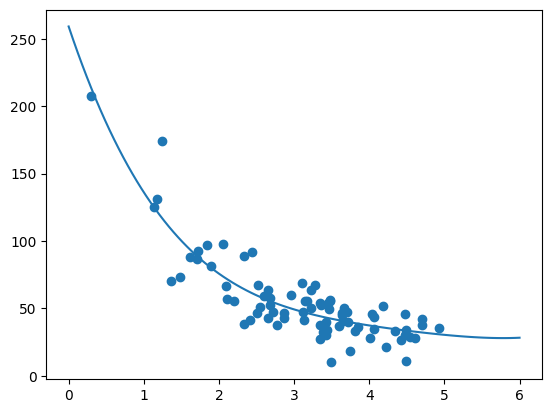

In [65]:
# Train and Test Split

# Our data set illustrates 100 customers in a shop, and their shopping habits.
# x - number of minutes before making a purchase
# y - amount of money spent
x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))

myline = np.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

Train Data R-squared: 0.7865621710729745
Test Data R-squared: 0.7749888876422321
